# MNIST data learning

## 1. import necessary lib

In [2]:
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## 2. load dataset and initial hyper parameter

In [5]:
torch.manual_seed(27) #reproducible
EPOCH = 4
BATCH_SIZE = 128

train_data = torchvision.datasets.MNIST(
    root='./mnist', #保存位置
    train=True, #training set
    transform=torchvision.transforms.ToTensor(), #converts a PIL.Image to torch.FloatTensor(C*H*W) in range(0.0,1.0)
    download=True
)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_data = torchvision.datasets.MNIST(
    root='./MNIST',
    train=False,
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False)

## 3. define network structure

In [8]:
torch.manual_seed(27)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.fc1 = nn.Linear(28*28,10)
        torch.nn.init.normal(self.fc1.weight, mean=0, std=0.01)
        #nn.init.xavier_normal(self.fc1.weight,gain =1)
        nn.init.constant(self.fc1.bias, 0.1)
    
        self.fc2 = nn.Linear(10,10)
        torch.nn.init.normal(self.fc2.weight, mean=0, std=0.01)
        #nn.init.xavier_normal(self.fc2.weight,gain = 1)
        nn.init.constant(self.fc2.bias, 0.01)
       # self.out = nn.Linear(10,10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        output = x
        #output = self.out(x)
        return output
    
cnn = CNN()
print(cnn)

CNN (
  (fc1): Linear (784 -> 10)
  (fc2): Linear (10 -> 10)
)


## 4. optimizer and loss function

In [9]:
learning_rate = 0.2
l2 = 1e-5
# optimizer:adagrad
optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate)
#loss function:cross-entropy with l2 regularizaiton
loss_func = nn.CrossEntropyLoss()

## 5.training process

In [31]:
#training loop
torch.manual_seed(27)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.fc1 = nn.Linear(28*28,10)
        torch.nn.init.normal(self.fc1.weight, mean=0, std=0.01)
        #nn.init.xavier_normal(self.fc1.weight,gain =1)
        nn.init.constant(self.fc1.bias, 0.1)
        self.fc1_1 = nn.BatchNorm1d(10)
    
        self.fc2 = nn.Linear(10,10)
        torch.nn.init.normal(self.fc2.weight, mean=0, std=0.3)
        #nn.init.xavier_normal(self.fc2.weight,gain = 1)
        nn.init.constant(self.fc2.bias, 0.01)
        self.fc2_1 = nn.BatchNorm1d(10)
       # self.out = nn.Linear(10,10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.fc1_1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.fc2_1(x)
        x = F.softmax(x)
        output = x
        #output = self.out(x)
        return output
    
cnn = CNN()
print(cnn)
learning_rate = 0.5
l2 = 1e-5
r1 = np.zeros(96)
# optimizer:adagrad
optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate,weight_decay = 0.0005)
#loss function:cross-entropy with l2 regularizaiton
loss_func = nn.CrossEntropyLoss()
for epoch in range(EPOCH):
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
       # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        cnn.zero_grad()

        # forward + backward + optimize
        outputs = cnn(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        #for params in cnn.parameters():
            
            #n = params.dim()
                #print(params.grad.data[0])
            #if n == 2:
            #    print(params.grad.data[0,5],params.data[0,5])
            #params.data -= learning_rate*params.grad.data
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 20 == 0:    # print every 2000 mini-batches
            correct = 0.0
            total = 0.0
            for data in test_loader:
                images, labels = data
                outputs = cnn(Variable(images))
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
                #result_data[idx][i/100+epoch*4] = correct/total
            r1[int(i/20)+epoch*24] = correct/total
            if i!=0:
                print('[%d, %5d] loss: %.8f accu:%.5f' %(epoch + 1, i , running_loss / 20, correct/total))
            running_loss = 0.0
print('Finished Training')

CNN (
  (fc1): Linear (784 -> 10)
  (fc1_1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True)
  (fc2): Linear (10 -> 10)
  (fc2_1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True)
)
[1,    20] loss: 2.12154568 accu:0.61520
[1,    40] loss: 1.96711219 accu:0.71070
[1,    60] loss: 1.86893430 accu:0.74070
[1,    80] loss: 1.80839980 accu:0.74980
[1,   100] loss: 1.78031671 accu:0.75480
[1,   120] loss: 1.74604303 accu:0.75670
[1,   140] loss: 1.74631991 accu:0.79050
[1,   160] loss: 1.73527373 accu:0.79990
[1,   180] loss: 1.73030491 accu:0.81380
[1,   200] loss: 1.70968771 accu:0.82500
[1,   220] loss: 1.70533699 accu:0.82990
[1,   240] loss: 1.69679167 accu:0.84050
[1,   260] loss: 1.70109174 accu:0.83850
[1,   280] loss: 1.68346237 accu:0.84290
[1,   300] loss: 1.67483414 accu:0.87100
[1,   320] loss: 1.64918481 accu:0.90200
[1,   340] loss: 1.61358808 accu:0.90590
[1,   360] loss: 1.61714158 accu:0.91120
[1,   380] loss: 1.60541360 accu:0.91220
[1,   400] loss: 1.59434495 

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


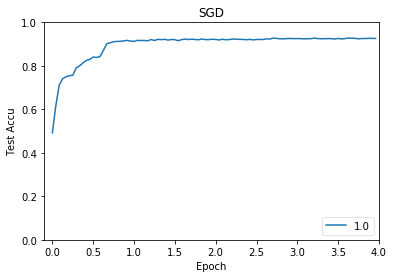

In [32]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
x_index=np.arange(0,4,4.0/96)
#X2 = result_data[1,:]
#X3 = result_data[2,:]
#X4 = result_data[3,:]
#X5 = result_data[4,:]
#X6 = result_data[5,:]
#X7 = result_data[6,:]
#X8 = result_data[7,:]
#X9 = result_data[8,:]
#X10 = result_data[9,:]

fig = plt.figure()
plt.title("SGD")
plt.xlabel('Epoch')
plt.ylabel('Test Accu')
plt.axis([-0.1,4,0.0,1.0]) 
plt.plot(x_index,r1,label='1.0')
#plt.plot(x_index,X2,label='0.2')
#plt.plot(x_index,X3,label='0.3')
#plt.plot(x_index,X4,label='0.4')
#plt.plot(x_index,X5,label='0.5')
#plt.plot(x_index,X6,label='0.6')
#plt.plot(x_index,X7,label='0.7')
#plt.plot(x_index,X8,label='0.8')
#plt.plot(x_index,X9,label='0.9')
#plt.plot(x_index,X10,label='1.0')
#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
#plt.savefig("cSGD para.png") 
plt.show()

## 6. result

In [18]:
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    outputs = cnn(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 90 %


## 7.different learning_rate training

In [27]:
def train(learning_rate,idx):
    torch.manual_seed(27)
    # network structure
    class CNN(nn.Module):
        def __init__(self,D_in,H,D_out):
            super(CNN, self).__init__()
            self.fc1 = nn.Linear(D_in,H)
            torch.nn.init.normal(self.fc1.weight, mean=0, std=0.01)
            #nn.init.xavier_normal(self.fc1.weight,gain = 1)
            nn.init.constant(self.fc1.bias, 0.1)
            self.fc1_1 = nn.BatchNorm1d(10)
        
            self.fc2 = nn.Linear(H,D_out)
            torch.nn.init.normal(self.fc2.weight, mean=0, std=0.3)
            #nn.init.xavier_normal(self.fc2.weight, gain = 1)
            nn.init.constant(self.fc2.bias, 0.1)
            self.fc2_1 = nn.BatchNorm1d(10)
           # self.out = nn.Linear(10,10)
        
        def forward(self, x):
            x = x.view(-1, 784)
            x = self.fc1(x)
            x = self.fc1_1(x)
            x = F.relu(x)
            x = self.fc2(x)
            x = self.fc2_1(x)
            x = F.softmax(x)
            output = x
            #output = self.out(x)
            return output
        
    D_in,H,D_out = 784,10,10
    cnn = CNN(D_in,H,D_out)
    lam = 0.001/learning_rate
    optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate)
    #loss function:cross-entropy with l2 regularizaiton
    loss_func = nn.CrossEntropyLoss()
    for epoch in range(EPOCH):
        running_loss = 0.0
        for i, data in enumerate(train_loader,0):
           # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            cnn.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            loss = loss_func(outputs, labels)
            loss.backward()
            #for params in cnn.parameters():
            
            #n = params.dim()
                #print(params.grad.data[0])
            #if n == 2:
            #    print(params.grad.data[0,5],params.data[0,5])
            #params.data -= learning_rate*params.grad.data
            optimizer.step()
            running_loss += loss.data[0]
            if i % 20 == 0:    # print every 2000 mini-batches
                correct = 0.0
                total = 0.0
                for data in test_loader:
                    images, labels = data
                    outputs = cnn(Variable(images))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum()
                    #result_data[idx][i/100+epoch*4] = correct/tota
                    
                result_data1[idx][int(i/20)+epoch*24] = correct/total
                if i!=0:
                    print('[%d, %5d] loss: %.8f accu:%.5f' %(epoch + 1, i , running_loss / 20, correct/total))
                running_loss = 0.0
    print('Finished Training')
    correct = 0.0
    total = 0.0
    for data in test_loader:
        images, labels = data
        outputs = cnn(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    print('lr:%f Accuracy: %f' % (learning_rate,(correct / total)))

In [28]:
np.random.seed(8)

x_lr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
result_data = np.zeros((len(x_lr),96))
result_data1 = np.zeros((len(x_lr),96))

for index in range(0, len(x_lr)):
    lr = x_lr[index]
    train(lr,index)

[1,    20] loss: 2.17397145 accu:0.67810
[1,    40] loss: 2.11212062 accu:0.69440
[1,    60] loss: 2.06864474 accu:0.69980
[1,    80] loss: 2.02466190 accu:0.70670
[1,   100] loss: 1.98474296 accu:0.72160
[1,   120] loss: 1.94270074 accu:0.72930
[1,   140] loss: 1.91718171 accu:0.73060
[1,   160] loss: 1.88930266 accu:0.73310
[1,   180] loss: 1.87674716 accu:0.74030
[1,   200] loss: 1.84215592 accu:0.74150
[1,   220] loss: 1.83444065 accu:0.74510
[1,   240] loss: 1.82281547 accu:0.75010
[1,   260] loss: 1.81904845 accu:0.75070
[1,   280] loss: 1.80051483 accu:0.75300
[1,   300] loss: 1.80451787 accu:0.75320
[1,   320] loss: 1.79286344 accu:0.75620
[1,   340] loss: 1.77377840 accu:0.75640
[1,   360] loss: 1.77357316 accu:0.75770
[1,   380] loss: 1.76658577 accu:0.75970
[1,   400] loss: 1.76040732 accu:0.76020
[1,   420] loss: 1.76039526 accu:0.76030
[1,   440] loss: 1.75487223 accu:0.76220
[1,   460] loss: 1.75762814 accu:0.75910
[2,    20] loss: 1.74231715 accu:0.76380
[2,    40] loss:

[1,   300] loss: 1.72795870 accu:0.82010
[1,   320] loss: 1.71639428 accu:0.82770
[1,   340] loss: 1.69718391 accu:0.83170
[1,   360] loss: 1.69840589 accu:0.83690
[1,   380] loss: 1.69158336 accu:0.83990
[1,   400] loss: 1.68292658 accu:0.84120
[1,   420] loss: 1.68310409 accu:0.84160
[1,   440] loss: 1.67583811 accu:0.84750
[1,   460] loss: 1.67802759 accu:0.84510
[2,    20] loss: 1.65794614 accu:0.84690
[2,    40] loss: 1.66011788 accu:0.84530
[2,    60] loss: 1.65185179 accu:0.84760
[2,    80] loss: 1.63581524 accu:0.89170
[2,   100] loss: 1.61832621 accu:0.90510
[2,   120] loss: 1.60716535 accu:0.90790
[2,   140] loss: 1.60152999 accu:0.91260
[2,   160] loss: 1.59972337 accu:0.91390
[2,   180] loss: 1.59771866 accu:0.91650
[2,   200] loss: 1.60041805 accu:0.91030
[2,   220] loss: 1.58288676 accu:0.91470
[2,   240] loss: 1.59091522 accu:0.91660
[2,   260] loss: 1.59418797 accu:0.91390
[2,   280] loss: 1.58789398 accu:0.91620
[2,   300] loss: 1.58289663 accu:0.91820
[2,   320] loss:

[2,   120] loss: 1.57522146 accu:0.91720
[2,   140] loss: 1.57511309 accu:0.92180
[2,   160] loss: 1.57396829 accu:0.92170
[2,   180] loss: 1.57286795 accu:0.92080
[2,   200] loss: 1.58273250 accu:0.92180
[2,   220] loss: 1.56446679 accu:0.92270
[2,   240] loss: 1.57353776 accu:0.92180
[2,   260] loss: 1.57837651 accu:0.91900
[2,   280] loss: 1.57454934 accu:0.92130
[2,   300] loss: 1.56798228 accu:0.92380
[2,   320] loss: 1.57144844 accu:0.92290
[2,   340] loss: 1.57154582 accu:0.92480
[2,   360] loss: 1.56619322 accu:0.92280
[2,   380] loss: 1.58203742 accu:0.92240
[2,   400] loss: 1.56685960 accu:0.92450
[2,   420] loss: 1.56150489 accu:0.92240
[2,   440] loss: 1.56944235 accu:0.92420
[2,   460] loss: 1.56684343 accu:0.92490
[3,    20] loss: 1.56709896 accu:0.92260
[3,    40] loss: 1.56372416 accu:0.92500
[3,    60] loss: 1.57110406 accu:0.92340
[3,    80] loss: 1.55732630 accu:0.92360
[3,   100] loss: 1.55756921 accu:0.92500
[3,   120] loss: 1.56456441 accu:0.92530
[3,   140] loss:

[2,   400] loss: 1.56276244 accu:0.92390
[2,   420] loss: 1.55814468 accu:0.92290
[2,   440] loss: 1.56509178 accu:0.92460
[2,   460] loss: 1.56318019 accu:0.92560
[3,    20] loss: 1.56263255 accu:0.92320
[3,    40] loss: 1.56042139 accu:0.92650
[3,    60] loss: 1.56767253 accu:0.92500
[3,    80] loss: 1.55382468 accu:0.92470
[3,   100] loss: 1.55421629 accu:0.92600
[3,   120] loss: 1.56099992 accu:0.92510
[3,   140] loss: 1.55468460 accu:0.92570
[3,   160] loss: 1.56089918 accu:0.92430
[3,   180] loss: 1.56155773 accu:0.92290
[3,   200] loss: 1.54940070 accu:0.92530
[3,   220] loss: 1.55363919 accu:0.92320
[3,   240] loss: 1.55862210 accu:0.92540
[3,   260] loss: 1.55143957 accu:0.92420
[3,   280] loss: 1.55831596 accu:0.92270
[3,   300] loss: 1.55974334 accu:0.92640
[3,   320] loss: 1.55208227 accu:0.92570
[3,   340] loss: 1.55225456 accu:0.93090
[3,   360] loss: 1.55775769 accu:0.92890
[3,   380] loss: 1.55367367 accu:0.92520
[3,   400] loss: 1.56169898 accu:0.92830
[3,   420] loss:

[3,   220] loss: 1.55791580 accu:0.92110
[3,   240] loss: 1.55999725 accu:0.92300
[3,   260] loss: 1.55595955 accu:0.92220
[3,   280] loss: 1.56012591 accu:0.92280
[3,   300] loss: 1.56084059 accu:0.92560
[3,   320] loss: 1.55385814 accu:0.92570
[3,   340] loss: 1.55329871 accu:0.92800
[3,   360] loss: 1.55950337 accu:0.92580
[3,   380] loss: 1.55746207 accu:0.92320
[3,   400] loss: 1.56276976 accu:0.92320
[3,   420] loss: 1.55590835 accu:0.92620
[3,   440] loss: 1.54798582 accu:0.92570
[3,   460] loss: 1.54506982 accu:0.92570
[4,    20] loss: 1.55197206 accu:0.92380
[4,    40] loss: 1.55399010 accu:0.92510
[4,    60] loss: 1.54714167 accu:0.92570
[4,    80] loss: 1.55956654 accu:0.92680
[4,   100] loss: 1.54905993 accu:0.92650
[4,   120] loss: 1.55075507 accu:0.92670
[4,   140] loss: 1.55613011 accu:0.92760
[4,   160] loss: 1.55660192 accu:0.92600
[4,   180] loss: 1.55146589 accu:0.92680
[4,   200] loss: 1.55371407 accu:0.92570
[4,   220] loss: 1.55758994 accu:0.92540
[4,   240] loss:

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


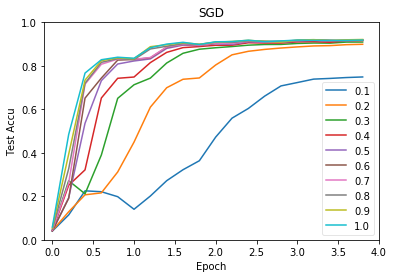

In [15]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
x_index=np.arange(0,4,4.0/96)
X1 = result_data[0,:]
X2 = result_data[1,:]
X3 = result_data[2,:]
X4 = result_data[3,:]
X5 = result_data[4,:]
X6 = result_data[5,:]
X7 = result_data[6,:]
X8 = result_data[7,:]
X9 = result_data[8,:]
X10 = result_data[9,:]

fig = plt.figure()
plt.title("SGD")
plt.xlabel('Epoch')
plt.ylabel('Test Accu')
plt.axis([-0.1,4,0.0,1.0]) 
plt.plot(x_index,X1,label='0.1')
plt.plot(x_index,X2,label='0.2')
plt.plot(x_index,X3,label='0.3')
plt.plot(x_index,X4,label='0.4')
plt.plot(x_index,X5,label='0.5')
plt.plot(x_index,X6,label='0.6')
plt.plot(x_index,X7,label='0.7')
plt.plot(x_index,X8,label='0.8')
plt.plot(x_index,X9,label='0.9')
plt.plot(x_index,X10,label='1.0')
#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
#plt.savefig("cSGD para.png") 
plt.show()

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


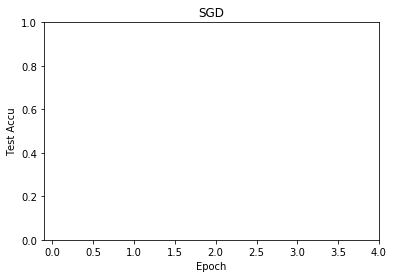

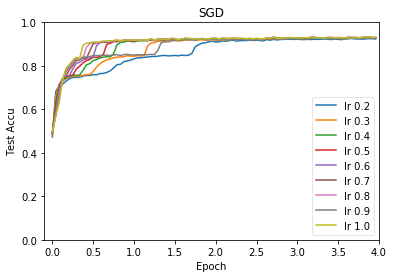

In [30]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
x_index=np.arange(0,4,4.0/96)
X1 = result_data1[0,:]
X2 = result_data1[1,:]
X3 = result_data1[2,:]
X4 = result_data1[3,:]
X5 = result_data1[4,:]
X6 = result_data1[5,:]
X7 = result_data1[6,:]
X8 = result_data1[7,:]
X9 = result_data1[8,:]
X10 = result_data1[9,:]

fig = plt.figure()
plt.title("SGD")
plt.xlabel('Epoch')
plt.ylabel('Test Accu')
plt.axis([-0.1,4,0.0,1.0]) 
#plt.plot(x_index,X1,label='lr 0.1')
plt.plot(x_index,X2,label='lr 0.2')
plt.plot(x_index,X3,label='lr 0.3')
plt.plot(x_index,X4,label='lr 0.4')
plt.plot(x_index,X5,label='lr 0.5')
plt.plot(x_index,X6,label='lr 0.6')
plt.plot(x_index,X7,label='lr 0.7')
plt.plot(x_index,X8,label='lr 0.8')
plt.plot(x_index,X9,label='lr 0.9')
plt.plot(x_index,X10,label='lr 1.0')
#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
plt.savefig("SGD.png") 
plt.show()